# Initial look at the database inspired by Chapter 1 Think Stats
***

I chose this data set because it is easy to find lots of documentation about its many characteristics and features.
***

In [63]:
# import statements including pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nba = pd.read_csv('all_seasons.csv')
nba.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [64]:
# I'm unable to see all the columns so I will list them separately
nba.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [65]:
# !pip install openpyxl

In [66]:
# League winners
# win = pd.read_html('https://www.basketball-reference.com/leagues/')
# import sqlite3
# # Create your connection.
# cnx = sqlite3.connect(':memory:')
# df[0].to_sql(name='nba', con=cnx)
# df1 = pd.read_sql('select * from nba', cnx)
# df1.to_excel("test.xlsx")
# !pip install xlrd
win = pd.read_excel("test.xlsx")
del win["Unnamed: 0"]
del win["index"]
win.columns = [ "Season", "League", "Champion", "MVP", "Rookie_of_the_Year", "Points", "Rebounds", "Assists", "Win_Shares"]
win

,Season,League,Champion,MVP,Rookie_of_the_Year,Points,Rebounds,Assists,Win_Shares
0,2020-21,NBA,NaN,N. Jokić,L. Ball,S. Curry (2015),R. Gobert (960),R. Westbrook (763),N. Jokić (15.6)
1,2019-20,NBA,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden (2335),R. Gobert (916),L. James (684),J. Harden (13.1)
2,2018-19,NBA,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden (2818),A. Drummond (1232),R. Westbrook (784),J. Harden (15.2)
3,2017-18,NBA,Golden State Warriors,J. Harden,B. Simmons,L. James (2251),A. Drummond (1247),R. Westbrook (820),J. Harden (15.4)
4,2016-17,NBA,Golden State Warriors,R. Westbrook,M. Brogdon,R. Westbrook (2558),A. Drummond (1115),J. Harden (907),J. Harden (15.0)
...,...,...,...,...,...,...,...,...,...
79,1950-51,NBA,Rochester Royals,NaN,P. Arizin,G. Mikan (1932),D. Schayes (1080),A. Phillip (414),G. Mikan (23.4)
80,1949-50,NBA,Minneapolis Lakers,NaN,A. Groza,G. Mikan (1865),NaN,D. McGuire (386),G. Mikan (21.1)
81,1948-49,BAA,Minneapolis Lakers,NaN,H. Shannon,G. Mikan (1698),NaN,B. Davies (321),G. Mikan (20.9)
82,1947-48,BAA,Baltimore Bullets,NaN,P. Hoffman,M. Zaslofsky (1007),NaN,H. Dallmar (120),B. Feerick (10.5)


In [67]:
nba.net_rating.value_counts().sort_index()

-200.0    1
-158.3    1
-150.0    1
-147.5    1
-144.9    1
         ..
 114.3    1
 120.0    1
 150.0    1
 250.0    1
 300.0    1
Name: net_rating, Length: 707, dtype: int64

In [68]:
nba.net_rating.describe()

count    11145.000000
mean        -2.153899
std         12.150611
min       -200.000000
25%         -6.300000
50%         -1.300000
75%          3.200000
max        300.000000
Name: net_rating, dtype: float64

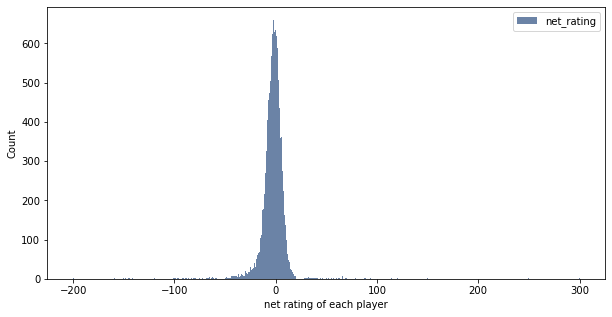

In [69]:
import thinkstats2
import thinkplot
lengths = np.floor(nba.net_rating)
hist = thinkstats2.Hist(lengths, label='net_rating')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='net rating of each player', ylabel='Count')

In [70]:
nba.oreb_pct.value_counts().sort_index()

0.000    425
0.002      2
0.003      9
0.004     11
0.005     27
        ... 
0.375      1
0.400      2
0.500      3
0.600      1
1.000      1
Name: oreb_pct, Length: 216, dtype: int64

In [71]:
nba.oreb_pct.describe()

count    11145.000000
mean         0.055593
std          0.043889
min          0.000000
25%          0.022000
50%          0.043000
75%          0.086000
max          1.000000
Name: oreb_pct, dtype: float64

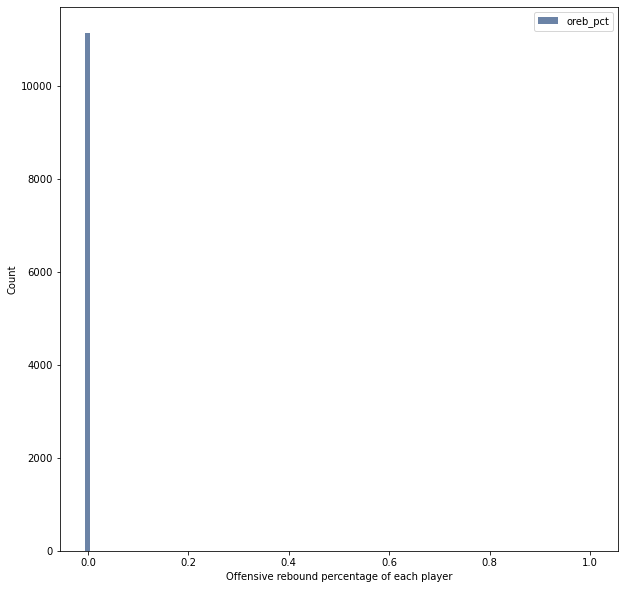

In [296]:
lengths = np.floor(nba.oreb_pct)
hist = thinkstats2.Hist(lengths, label='oreb_pct')
thinkplot.Hist(hist, width =0.01)
thinkplot.Config(xlabel='Offensive rebound percentage of each player', ylabel='Count')

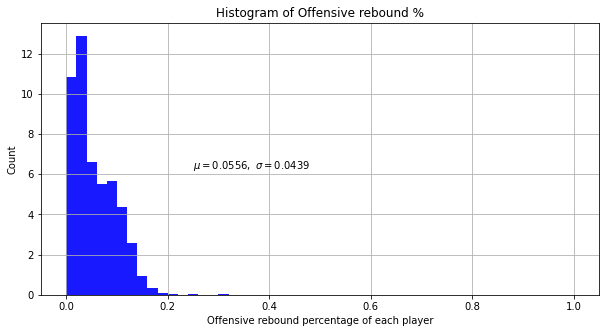

In [73]:
import matplotlib.pyplot as plt
n_bins = 50

x = nba.oreb_pct

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('Offensive rebound percentage of each player')
plt.ylabel('Count')
plt.title('Histogram of Offensive rebound %')
plt.text(.25, 6.25, r'$\mu=0.0556,\ \sigma=0.0439$')
plt.rcParams["figure.figsize"] = (10,5)
# plt.xlim(0.0, 0.6)
# plt.ylim(0, 3000)
plt.grid(True)
plt.show()

In [297]:
nba.dreb_pct.describe()

count    11145.000000
mean         0.141772
std          0.063194
min          0.000000
25%          0.096000
50%          0.132000
75%          0.182000
max          1.000000
Name: dreb_pct, dtype: float64

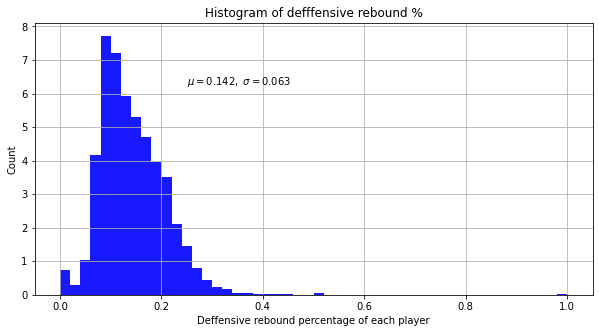

In [299]:
import matplotlib.pyplot as plt
n_bins = 50

x = nba.dreb_pct

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('Deffensive rebound percentage of each player')
plt.ylabel('Count')
plt.title('Histogram of defffensive rebound %')
plt.text(.25, 6.25, r'$\mu=0.142,\ \sigma=0.063$')
plt.rcParams["figure.figsize"] = (10,5)
# plt.xlim(0.0, 0.6)
# plt.ylim(0, 3000)
plt.grid(True)
plt.show()

In [74]:
nba.ts_pct.value_counts().sort_index()

0.000    136
0.046      1
0.051      1
0.056      2
0.091      1
        ... 
1.025      1
1.042      1
1.050      1
1.064      7
1.500      3
Name: ts_pct, Length: 529, dtype: int64

In [75]:
nba.ts_pct.describe()

count    11145.000000
mean         0.508099
std          0.098879
min          0.000000
25%          0.478000
50%          0.521000
75%          0.557000
max          1.500000
Name: ts_pct, dtype: float64

In [301]:
lengths = np.floor(nba.ts_pct)
hist = thinkstats2.Hist(lengths, label='ts_pct')
thinkplot.Bar(hist, width= 0.01)
thinkplot.Config(xlabel='True shooting percentage of each player', ylabel='Frequency')

TypeError: Bar() missing 1 required positional argument: 'ys'

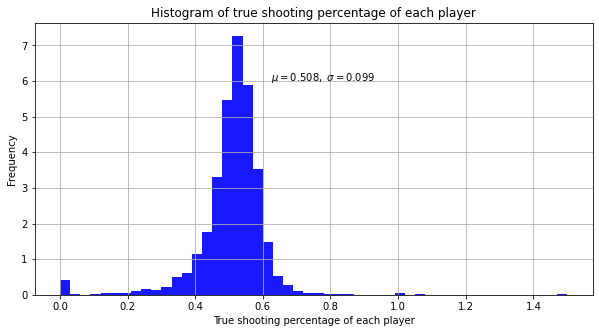

In [77]:
import matplotlib.pyplot as plt
n_bins = 50

x = nba.ts_pct

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('True shooting percentage of each player')
plt.ylabel('Frequency')
plt.title('Histogram of true shooting percentage of each player')
plt.text(0.625,6,  r'$\mu=0.508,\ \sigma=0.099$')
plt.rcParams["figure.figsize"] = (10,5)
# plt.xlim(18, 44)
# plt.ylim(0, 3000)
plt.grid(True)
plt.show()

In [78]:
nba.age.value_counts().sort_index()

18.0       3
19.0      67
20.0     246
21.0     425
22.0     678
23.0    1039
24.0    1143
25.0    1025
26.0     933
27.0     891
28.0     774
29.0     718
30.0     654
31.0     581
32.0     502
33.0     424
34.0     329
35.0     232
36.0     180
37.0     126
38.0      83
39.0      51
40.0      27
41.0       7
42.0       3
43.0       3
44.0       1
Name: age, dtype: int64

In [79]:
nba.age.describe()

count    11145.000000
mean        27.168686
std          4.344164
min         18.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

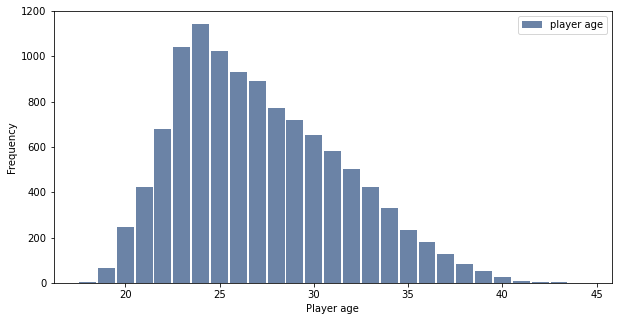

In [80]:
lengths = np.floor(nba.age)
hist = thinkstats2.Hist(lengths, label='player age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Player age', ylabel='Frequency')

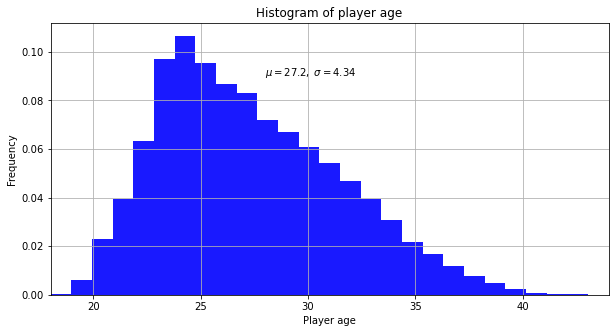

In [81]:
import matplotlib.pyplot as plt
n_bins = 50

x = nba.age

# the histogram of the data
n, bins, patches = plt.hist(x, 27, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('Player age')
plt.ylabel('Frequency')
plt.title('Histogram of player age')
plt.text(28,0.09,  r'$\mu=27.2,\ \sigma=4.34$')
plt.rcParams["figure.figsize"] = (10,5)
plt.xlim(18, 44)
# plt.ylim(0, 3000)
plt.grid(True)
plt.show()

In [82]:
nba.player_height.value_counts().sort_index()

160.02       5
165.10      13
167.64       1
175.26      24
177.80      52
180.34     104
182.88     254
183.00       1
185.42     440
187.96     496
190.50     755
193.04     619
195.58     807
196.00       5
198.12     918
200.66    1093
201.00      13
203.00       1
203.20    1061
205.74    1369
208.28    1133
210.82     958
213.36     673
215.90     193
218.44      82
220.98      43
223.52       7
226.06       6
228.60      16
231.14       3
Name: player_height, dtype: int64

In [83]:
nba.player_height.describe()

count    11145.000000
mean       200.812818
std          9.190973
min        160.020000
25%        195.580000
50%        200.660000
75%        208.280000
max        231.140000
Name: player_height, dtype: float64

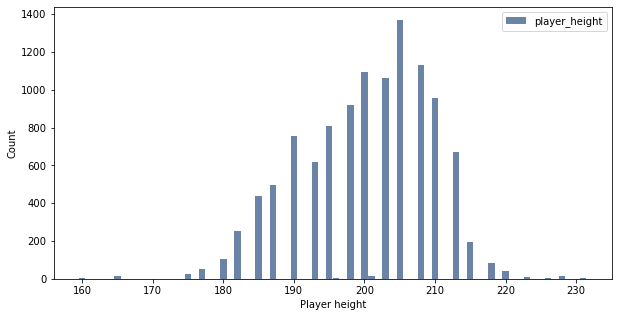

In [84]:
lengths = np.floor(nba.player_height)
hist = thinkstats2.Hist(lengths, label='player_height')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Player height', ylabel='Count')

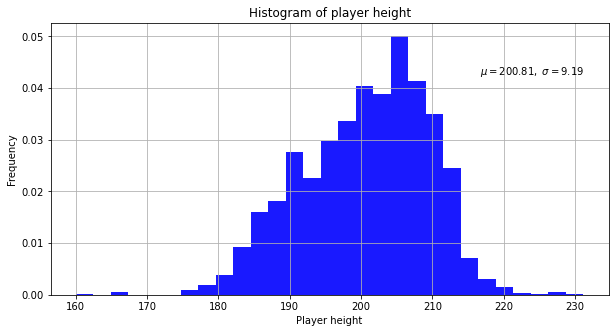

In [85]:
import matplotlib.pyplot as plt
n_bins = 50

x = nba.player_height

# the histogram of the data
n, bins, patches = plt.hist(x, 29, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('Player height')
plt.ylabel('Frequency')
plt.title('Histogram of player height')
plt.text(216.725, 0.0425, r'$\mu=200.81,\ \sigma=9.19$')
plt.rcParams["figure.figsize"] = (10,5)
# plt.xlim(0.0, 0.6)
# plt.ylim(0, 3000)
plt.grid(True)
plt.show()

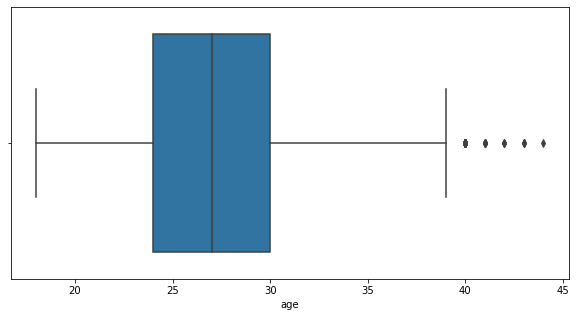

In [96]:
sns.boxplot(x=nba.age)

In [102]:
print("I am looking for the comparison of the rookie of the year there for I believe that the older player do not affect my analysis")

nba[nba.age> 41]

I am looking for the comparison of the rookie of the year there for I believe that the older player do not affect my analysis


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
270,270,Robert Parish,CHI,43.0,215.90,110.676448,Centenary (LA),USA,1976,1,...,3.7,2.1,0.5,14.9,0.114,0.130,0.201,0.514,0.082,1996-97
3575,3575,Kevin Willis,ATL,42.0,213.36,111.130040,Michigan State,USA,1984,1,...,3.0,2.6,0.3,-15.5,0.091,0.164,0.151,0.434,0.043,2004-05
4820,4820,Kevin Willis,DAL,44.0,213.36,111.130040,Michigan State,USA,1984,1,...,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006-07
4937,4937,Dikembe Mutombo,HOU,42.0,218.44,117.933920,Georgetown,Congo,1991,1,...,3.0,5.1,0.1,3.6,0.118,0.221,0.086,0.591,0.012,2007-08
5365,5365,Dikembe Mutombo,HOU,43.0,218.44,117.933920,Georgetown,Congo,1991,1,...,1.8,3.7,0.0,1.8,0.152,0.241,0.111,0.472,0.000,2008-09
10435,10435,Vince Carter,ATL,42.0,198.12,99.790240,North Carolina,USA,1998,1,...,7.4,2.6,1.1,-6.3,0.021,0.114,0.164,0.565,0.097,2018-19
10960,10960,Vince Carter,ATL,43.0,198.12,99.790240,North Carolina,USA,1998,1,...,4.9,2.1,0.8,-8.6,0.019,0.116,0.163,0.464,0.082,2019-20


In [103]:
nba[nba.age== 40]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
203,203,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,1979,8,...,0.3,1.1,0.3,2.6,0.068,0.103,0.025,0.400,0.046,1996-97
385,385,John Long,TOR,40.0,195.58,90.718400,Detroit Mercy,USA,1978,2,...,4.0,1.3,0.7,-9.8,0.017,0.101,0.182,0.499,0.104,1996-97
870,870,Herb Williams,NYK,40.0,208.28,109.769264,Ohio State,USA,1981,1,...,1.4,1.1,0.1,-8.0,0.042,0.160,0.143,0.398,0.041,1997-98
944,944,Dan Schayes,ORL,40.0,210.82,117.933920,Syracuse,USA,1981,1,...,1.5,0.7,0.2,7.2,0.026,0.098,0.131,0.431,0.044,1998-99
1155,1155,Rick Mahorn,PHI,40.0,208.28,117.933920,Hampton,USA,1980,2,...,0.8,1.4,0.1,-12.2,0.061,0.170,0.099,0.302,0.024,1998-99
1250,1250,Eddie Johnson,HOU,40.0,200.66,97.522280,Illinois,USA,1981,2,...,4.0,0.7,0.3,-20.8,0.000,0.154,0.292,0.462,0.063,1998-99
2195,2195,Sam Perkins,IND,40.0,205.74,117.933920,North Carolina,USA,1984,1,...,3.8,2.6,0.6,0.1,0.037,0.159,0.123,0.499,0.066,2000-01
2274,2274,John Stockton,UTA,40.0,185.42,79.378600,Gonzaga,USA,1984,1,...,13.4,3.2,8.2,3.1,0.028,0.099,0.197,0.601,0.442,2001-02
3009,3009,Kevin Willis,SAS,40.0,213.36,111.130040,Michigan State,USA,1984,1,...,4.2,3.2,0.3,-6.0,0.116,0.206,0.196,0.506,0.051,2002-03
3055,3055,Michael Jordan,WAS,40.0,198.12,97.975872,North Carolina,USA,1984,1,...,20.0,6.1,3.8,0.0,0.028,0.167,0.288,0.491,0.207,2002-03


In [104]:
print("When I look at the players represented in the age of 40 and above non of them have their draft year the same as the season year")
rookie = nba[nba.season.str[0:4] == nba.draft_year]
rookie

When I look at the players represented in the age of 40 and above non of them have their draft year the same as the season year


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
21,21,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97
30,30,Derek Fisher,LAL,22.0,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97
68,68,Jamie Feick,SAS,22.0,203.20,115.665960,Michigan State,USA,1996,2,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
73,73,Jason Sasser,DAL,23.0,200.66,102.058200,Texas Tech,USA,1996,2,...,2.4,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97
77,77,Jeff McInnis,DEN,22.0,193.04,86.182480,North Carolina,USA,1996,2,...,5.0,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11102,11102,Nickeil Alexander-Walker,NOP,21.0,195.58,92.986360,Virginia Tech,Canada,2019,1,...,5.1,2.0,1.8,-5.1,0.015,0.135,0.227,0.441,0.207,2019-20
11104,11104,Nicolas Claxton,BKN,20.0,210.82,97.522280,Georgia,USA,2019,2,...,4.4,2.9,1.1,-15.6,0.090,0.112,0.144,0.577,0.142,2019-20
11113,11113,Mfiondu Kabengele,LAC,22.0,205.74,113.398000,Florida State,Canada,2019,1,...,3.5,0.9,0.2,0.8,0.017,0.159,0.242,0.614,0.050,2019-20
11125,11125,Marial Shayok,PHI,24.0,195.58,89.811216,Iowa State,Canada,2019,2,...,1.5,1.5,0.5,-40.0,0.000,0.273,0.214,0.300,0.111,2019-20


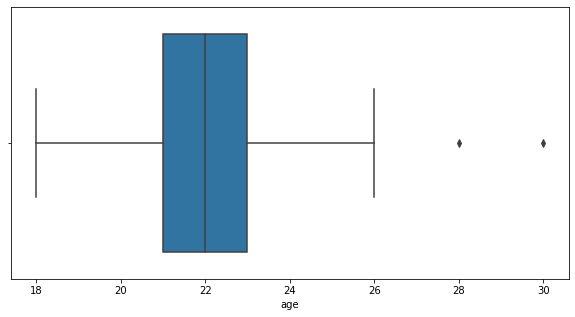

In [107]:
sns.boxplot(x=rookie.age)

In [116]:
print("When I compare the rookie ages with the ages in the nba database that I have the rookie database has less outliers.")
print("I chose to focus on the rookies in order to gain focus in the data and and sharpen my ability to detect and remove outliers in an acceptable way.")

When I compare the rookie ages with the ages in the nba database that I have the rookie database has less outliers.
I chose to focus on the rookies in order to gain focus in the data and and sharpen my ability to detect and remove outliers in an acceptable way.


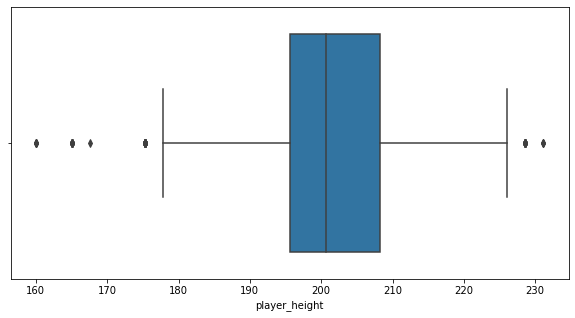

In [95]:
import seaborn as sns
sns.boxplot(x=nba.player_height)

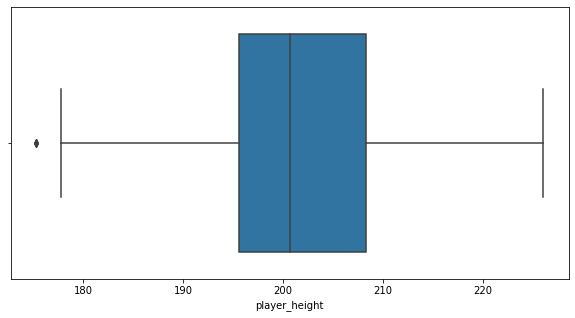

In [105]:
sns.boxplot(x=rookie.player_height)

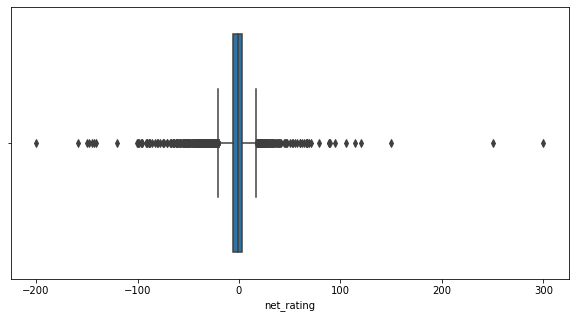

In [98]:
sns.boxplot(x=nba.net_rating)

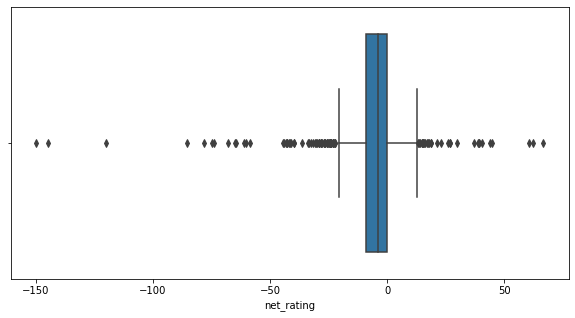

In [111]:
sns.boxplot(x=rookie.net_rating)

In [ ]:
print("When we compare rookie net rating to the nba net rating, rookie has less outliers.")

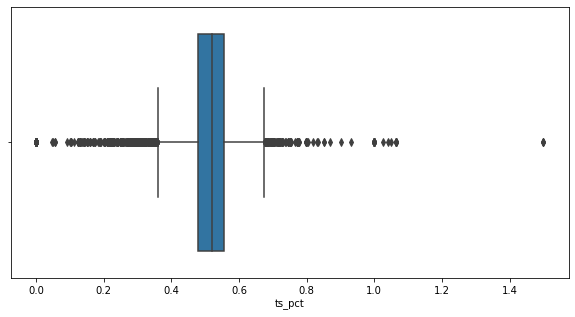

In [97]:
sns.boxplot(x=nba.ts_pct)

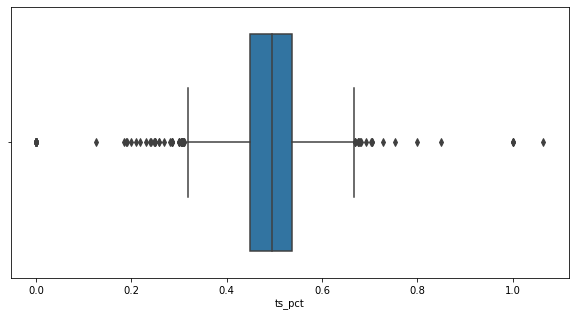

In [112]:
sns.boxplot(x=rookie.ts_pct)

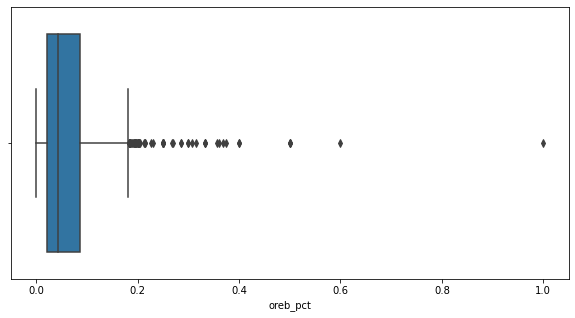

In [99]:
sns.boxplot(x=nba.oreb_pct)

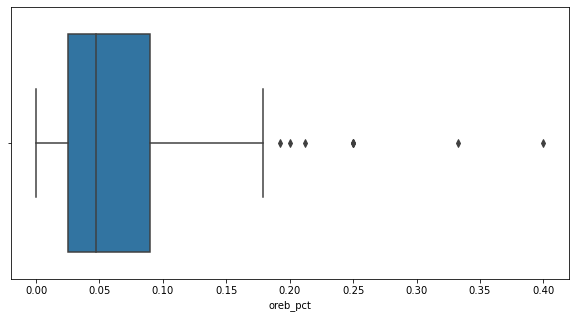

In [113]:
sns.boxplot(x=rookie.oreb_pct)

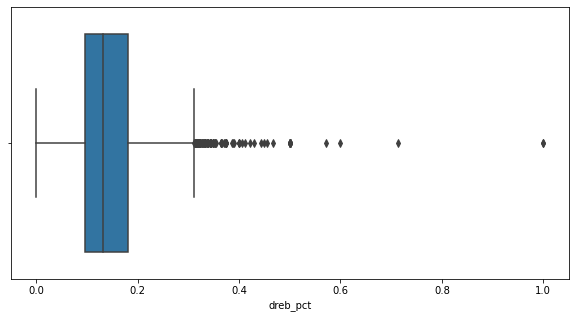

In [100]:
sns.boxplot(x=nba.dreb_pct)

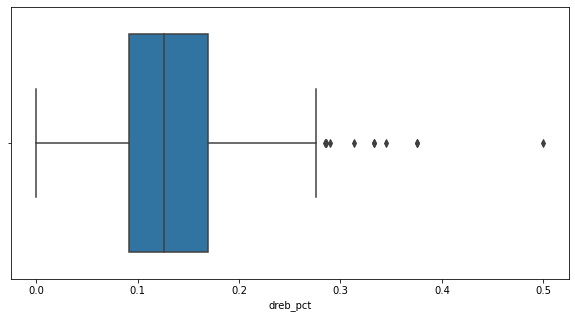

In [114]:
sns.boxplot(x=rookie.dreb_pct)

In [ ]:
print("As I examine all the features between the rookie data and the nba data, the rookie data has less outliers.")

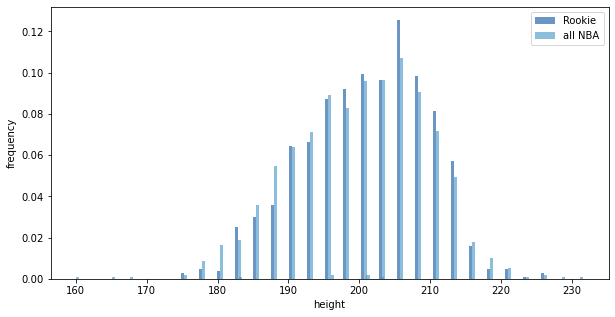

<Figure size 576x432 with 0 Axes>

In [256]:
# identify the list of nba player that we do not have their rookie year data
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))
a = nba.player_name.to_list()
b = rookie.player_name.to_list()
c = Diff(a, b)

#  take the player for which do not have their rookie year select their earliest year
other_nba = nba[nba.player_name.isin(c)]
other_nba = other_nba.sort_values(by=['age'])
other_nba = other_nba.drop_duplicates(subset="player_name", keep='first')




first_hist = thinkstats2.Hist(other_nba.player_height, label='other NBA')
other_hist = thinkstats2.Hist(rookie.player_height, label='Rookie')
other_pmf = thinkstats2.Pmf(other_nba.player_height, label='all NBA')
pmf = thinkstats2.Pmf(rookie.player_height, label='Rookie')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Show(xlabel='height', ylabel='frequency')

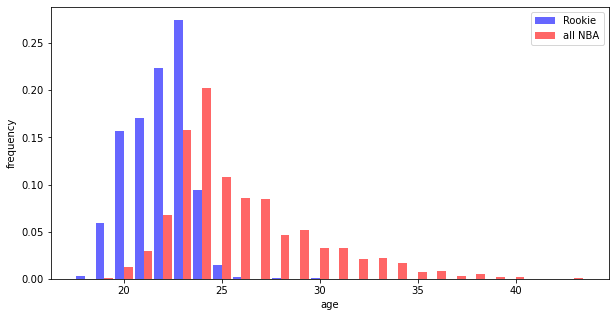

<Figure size 576x432 with 0 Axes>

In [257]:
other_pmf = thinkstats2.Pmf(other_nba.age, label='all NBA')
pmf = thinkstats2.Pmf(rookie.age, label='Rookie')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(pmf, align='right', width=width, color = "b")
thinkplot.Hist(other_pmf, align='left', width=width, color = "r")


thinkplot.Show(xlabel='age', ylabel='frequency') 


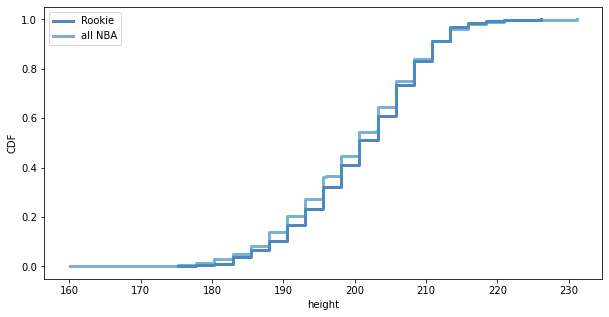

<Figure size 576x432 with 0 Axes>

In [262]:
cdf = thinkstats2.Cdf(rookie.player_height, label='Rookie')
other_cdf = thinkstats2.Cdf(other_nba.player_height, label='all NBA')
width = 0.45
# thinkplot.PrePlot(2)
# thinkplot.Hist(cdf, align='right', width=width, color = "b")
# thinkplot.Hist(other_cdf, align='left', width=width, color = "r")


# thinkplot.Show(xlabel='age', ylabel='frequency')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, other_cdf])
thinkplot.Show(xlabel='height', ylabel='CDF')

In [294]:
nba.oreb_pct.describe()

count    11145.000000
mean         0.055593
std          0.043889
min          0.000000
25%          0.022000
50%          0.043000
75%          0.086000
max          1.000000
Name: oreb_pct, dtype: float64

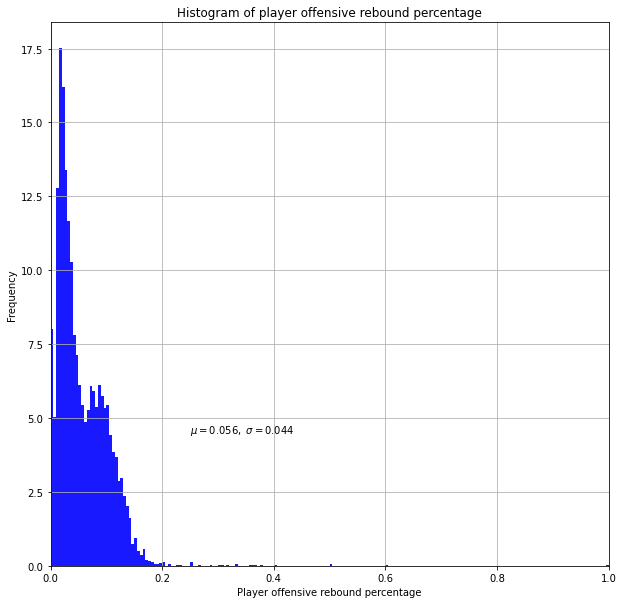

In [303]:
x = nba.oreb_pct

# the histogram of the data
n, bins, patches = plt.hist(x, 200, density=True, facecolor='blue', alpha=0.9)


plt.xlabel('Player offensive rebound percentage')
plt.ylabel('Frequency')
plt.title('Histogram of player offensive rebound percentage')
plt.text(0.25,4.5,  r'$\mu=0.056,\ \sigma=0.044$')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlim(0, 1.0)
plt.grid(True)
plt.show()

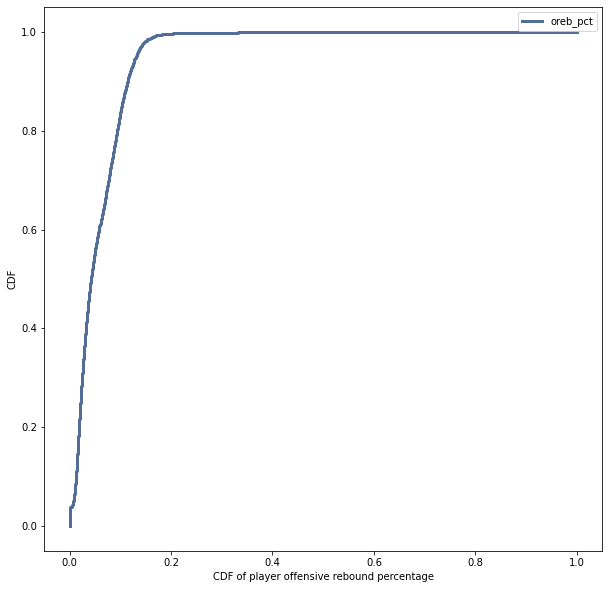

<Figure size 576x432 with 0 Axes>

In [305]:
# df = ReadBabyBoom()
# diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(nba.oreb_pct, label='oreb_pct')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='CDF of player offensive rebound percentage', ylabel='CDF')

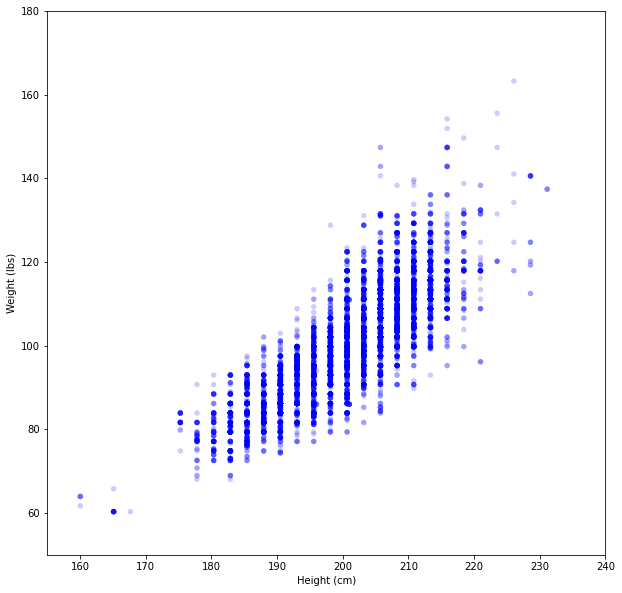

<Figure size 576x432 with 0 Axes>

In [310]:
thinkplot.Scatter(nba.player_height, nba.player_weight)
thinkplot.Show(xlabel='Height (cm)',
ylabel='Weight (lbs)',
axis=[155, 240, 50, 180])

In [318]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx = np.mean(xs)
    varx = np.var(xs)
    meany = np.mean(ys)
    vary = np.var(ys)
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

def SpearmanCorr1(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [320]:
height_weight_cov = Cov(nba.player_height, nba.player_weight)
height_weight_corr = Corr(nba.player_height, nba.player_weight)
height_weight_corr_sp1 = SpearmanCorr1(nba.player_height, nba.player_weight)
height_weight_corr_sp = SpearmanCorr(nba.player_height, nba.player_weight)
print(height_weight_cov, height_weight_corr, height_weight_corr_sp1, height_weight_corr_sp)

95.91836573809445 0.829901431710946 0.8399647922017057 0.8399647922017057


The NBA players height and weight appear to covary and both Pearson and Spearmans correlation is posting strong positive numbers. This suggests that most of the difference in weight can be explained by the difference in the player height. This can be interpreted as a causal relationship.

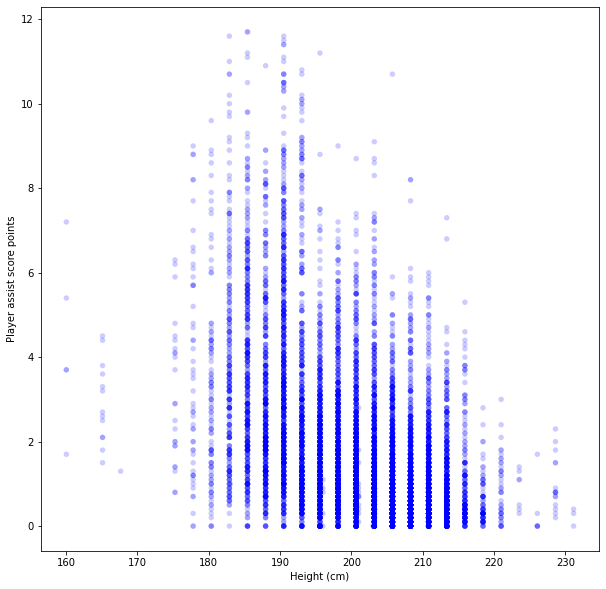

<Figure size 576x432 with 0 Axes>

In [322]:
thinkplot.Scatter(nba.player_height, nba.ast)
thinkplot.Show(xlabel='Height (cm)',
ylabel='Player assist score points') #,
#axis=[155, 240, 50, 180])

In [323]:
height_assist_cov = Cov(nba.player_height, nba.ast)
height_assist_corr = Corr(nba.player_height, nba.ast)
height_assist_corr_sp1 = SpearmanCorr1(nba.player_height, nba.ast)
height_assist_corr_sp = SpearmanCorr(nba.player_height, nba.ast)
print(height_assist_cov, height_assist_corr, height_assist_corr_sp1, height_assist_corr_sp)

-7.63120187872212 -0.4639080079970386 -0.4688629687038491 -0.46886296870384914


I am truly shocked by this number. I thought that if I plotted this graph the taller players would make more points from assist scores. But the data says the opposite thing. The shorter players score more assist points. It appears assist points are negatively incentivized in relation to teams becoming NBA champions.

In [ ]:
# import sweetviz as sv
# analyze_report = sv.analyze(nba)
# analyze_report.show_notebook(w=900, h=700, scale=0.8)
# from pandas_profiling import ProfileReport
# profile = ProfileReport(nba, title="All NBA Players Profiling Report")
# profile

In [ ]:
# profile2 = ProfileReport(win, title="NBA Winning Players Profiling Report")
# profile2

In [ ]:
# cols = pd.MultiIndex.from_tuples(('Unnamed: 0_level_0', 'Season'), ('Unnamed: 1_level_0', 'Lg'), ('Unnamed: 2_level_0', 'Champion'), ('Award Winners', 'MVP'), ('Award Winners', 'Rookie of the Year'), ('Top Performers', 'Points'), ('Top Performers', 'Rebounds'), ('Top Performers','Assists'), ('Top Performers', 'Win Shares'))
# df = pd.DataFrame([[1,2], [3,4], [5,6], [7,8], [9,10], [11,12], [13,14], [15,16], [17,18]], columns=cols)
# df
# Net_rating,oreb_pct Offensive Rebound %,dreb_pct Defensive Rebound %, ast_pct Assist %, ts_pct true shooting percentage
# usg_pct Usage Rate (how many plays that help the team)

In [ ]:
# import sqlite3
# # Create your connection.
# cnx = sqlite3.connect(':memory:')
# win[0].to_sql(name='nba', con=cnx)
# df1 = pd.read_sql('select * from nba', cnx)
# df1

In [ ]:
# df1.to_excel("test4.xlsx")

In [ ]:
# profile.to_file("nba_profile.html")